# Pre-processing

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
data = load_breast_cancer()

df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['Target'] = data['target']

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Outliers treatment
### Grubbs test

Statistical test for outliers detection (Only applicable for normal distributions)

In [3]:
from outliers import smirnov_grubbs as grubbs
import numpy as np

In [6]:
for col in df.drop(columns = 'Target').columns:
    max_out = grubbs.max_test_outliers(np.array(df[col]), alpha=.05)
    min_out = grubbs.min_test_outliers(np.array(df[col]), alpha=.05)
    
    if len(max_out) > 0 or len(min_out) > 0:
        print(col)
    if len(max_out) > 0:
        print('Max outliers > ', min(max_out))
        df = df[df[col] < min(max_out)]
    if len(min_out) > 0:
        print('Min outliers < ', max(min_out))
        df = df[df[col] > max(min_out)]

concavity error
Max outliers >  0.08079
fractal dimension error
Max outliers >  0.008015


In [7]:
df.reset_index(drop=True, inplace = True)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
3,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
4,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0


## Feature selection
### Kolmorogov-Smirnov test
Statistical test that verify if two distributions are similar/comes from the same normal distribution

In [8]:
from scipy import stats

In [9]:
for col in df.drop(columns = 'Target').columns:
    pvalue = stats.ks_2samp(df[df['Target']==0][col], df[df['Target']==1][col]).pvalue
    if pvalue >= 0.05:
        print('Rejected column (Similar distributions): {} (p-value = {})'.format(col, pvalue))
        df.drop(columns = col, inplace = True)

Rejected column (Similar distributions): texture error (p-value = 0.21634207254006255)
Rejected column (Similar distributions): smoothness error (p-value = 0.2831640347835501)


In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
3,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
4,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0


### Boruta algorithm
Basically, it selects the most relevant features based on the feature importances obtained through Random Forest algorithms

In [11]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [12]:
X = df.drop(columns = 'Target')
y = df['Target']

In [13]:
forest = RandomForestClassifier(n_jobs=-1)
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=0)
feat_selector.fit(X.values, y.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	8
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	8
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	8
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	8
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	18
Tentative: 	7
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	18
Tentative: 	7
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	18
Tentative: 	7
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	18
Tentative: 	7
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	19
Tentative: 	6
Rejected: 	3
I

BorutaPy(estimator=RandomForestClassifier(n_estimators=67, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x184ABA68340),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x184ABA68340, verbose=2)

In [14]:
feature_ranks = pd.DataFrame({'feature':X.columns,'ranking':feat_selector.ranking_,'Accept':feat_selector.support_})

In [15]:
X.drop(columns = list(feature_ranks[feature_ranks['Accept'] == False]['feature']), inplace = True)

In [16]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,12.45,15.70,82.57,477.1,0.17000,0.1578,0.08089,0.3345,2.217,27.19,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,18.25,19.98,119.60,1040.0,0.10900,0.1127,0.07400,0.4467,3.180,53.91,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


### PCA

Scaling

In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
scaler = RobustScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

PCA

In [19]:
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

(448, 20)
[6.45165322e-01 1.41906190e-01 6.86830826e-02 5.92370346e-02
 2.60586929e-02 1.80949636e-02 1.36296390e-02 7.10651451e-03
 5.98025576e-03 3.78950444e-03 2.79520039e-03 2.36586438e-03
 1.81288327e-03 1.24816643e-03 9.93372459e-04 5.82388241e-04
 4.11614981e-04 9.15287955e-05 4.22791996e-05 5.50313880e-06]
['PC01', 'PC02', 'PC03', 'PC04', 'PC05', 'PC06', 'PC07', 'PC08', 'PC09', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']


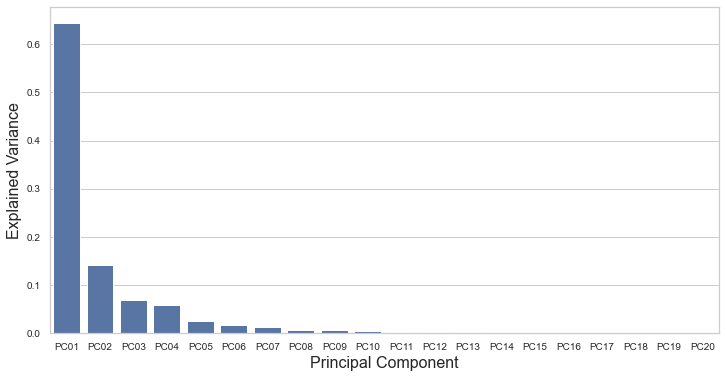

In [20]:
nPCA = len(X.columns)

pcaAll = PCA(n_components = nPCA)
pcaAll.fit(scaled_data)
x_pca_All = pcaAll.transform(scaled_data)
print(x_pca_All.shape)
print(pcaAll.explained_variance_ratio_)

pc_names= []

for i in range(nPCA):
    pc_names.append("PC%0.2d" % (i+1))
    
print(pc_names)
    
    
sns.set_theme(style="whitegrid")
plt.figure(figsize = (12,6))
ax = sns.barplot(x=pc_names, y=pcaAll.explained_variance_ratio_, color='b')
plt.tick_params(labelsize=10)
plt.xlabel('Principal Component', size = 16)
plt.ylabel('Explained Variance', size = 16)
plt.show()

In [21]:
pcaAll.explained_variance_ratio_[:12].sum()

0.9948122634806276

In [22]:
nPCA = 10

pca = PCA(n_components = nPCA)
pca.fit(scaled_data)
X_pca = pca.transform(scaled_data)
X_pca = pd.DataFrame(X_pca)

In [23]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,5.957317,-2.194385,-1.450285,-0.167148,-0.694979,-0.383369,1.456618,0.103518,0.583459,0.439535
1,7.939563,0.090557,0.441206,-0.930053,-0.375203,0.302911,-0.491021,0.222821,0.333514,0.159313
2,6.970815,-2.199521,-0.032964,-2.348542,0.884256,-0.283119,-0.102020,0.017021,0.585696,-0.301648
3,1.593908,4.791936,0.057138,-1.166422,-0.316182,0.360219,0.152939,-0.034419,0.303600,-0.048691
4,4.770630,-0.386930,-0.959552,0.357948,-0.467621,-0.502110,0.353892,-0.149115,-0.027879,0.261603


Including the column target

In [24]:
X_pca['target'] = y

In [26]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,target
0,5.957317,-2.194385,-1.450285,-0.167148,-0.694979,-0.383369,1.456618,0.103518,0.583459,0.439535,0
1,7.939563,0.090557,0.441206,-0.930053,-0.375203,0.302911,-0.491021,0.222821,0.333514,0.159313,0
2,6.970815,-2.199521,-0.032964,-2.348542,0.884256,-0.283119,-0.102020,0.017021,0.585696,-0.301648,0
3,1.593908,4.791936,0.057138,-1.166422,-0.316182,0.360219,0.152939,-0.034419,0.303600,-0.048691,0
4,4.770630,-0.386930,-0.959552,0.357948,-0.467621,-0.502110,0.353892,-0.149115,-0.027879,0.261603,0


In [27]:
X_pca.to_csv('pca.csv', index = False)